<a href="https://colab.research.google.com/github/JM-mochi/ForestFirePrediction/blob/main/FFP_CE_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy scikit-learn matplotlib

In [2]:
!git clone https://github.com/JM-mochi/ForestFirePrediction.git


Cloning into 'ForestFirePrediction'...
remote: Enumerating objects: 1278, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 1278 (delta 29), reused 47 (delta 15), pack-reused 1201
Receiving objects: 100% (1278/1278), 774.40 MiB | 27.41 MiB/s, done.
Resolving deltas: 100% (345/345), done.
Updating files: 100% (427/427), done.


In [3]:
%cd ForestFirePrediction


/content/ForestFirePrediction


In [4]:
pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for diffuser: filename=diffuser-0.0.1-py3-none-any.whl size=1587 sha256=61918388d336b95fed9646921c755c86815dd8d9d75cd414171ab820d9fd9ea6
  Stored in directory: /root/.cache/pip/wheels/23/ea/47/62b8e2a4b986d358851edbf8c384c84eb7ce7a04812b1b98fd
Successfully built diffuser


In [5]:
!pip install diffusers==0.26.3
!pip install -U jax jaxlib
!pip install wandb
!pip show diffusers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 9.8 MB/s eta 0:00:00
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.4.26+cuda12.cudnn89
    Uninstalling jaxlib-0.4.26+cuda12.cudnn89:
      Successfully uninstalled jaxlib-0.4.26+cuda12.cudnn89
  Attempting uninstall: jax
    Found existing installation: jax 0.4.26
    Uninstalling jax-0.4.26:
      Successfully uninstalled jax-0.4.26
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.2/300.2 kB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.6 MB/s eta 0:00:00
Name: diffusers
Version: 0.26.3
Summary: State-of-the-art diffusion in PyTorch and JAX.
Home-p

modis

In [6]:
pip install earthengine-api --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 392.9/392.9 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: earthengine-api
    Found existing installation: earthengine-api 0.1.408
    Uninstalling earthengine-api-0.1.408:
      Successfully uninstalled earthengine-api-0.1.408


In [7]:
import geemap
import ee

ee.Authenticate()
ee.Initialize(project='august-boulder-424715-s1')

#aoi = ee.Geometry(Point([-48.4, -23]))

fire = ee.ImageCollection('MODIS/006/MCD64A1').filter(ee.Filter.date('2018-01-01', '2020-12-31'))

burnedArea = fire.select('BurnDate')
burnedAreaVis = {
  'min': 30.0,
  'max': 341.0,
  'opacity': 0.5,
  'palette': ['4e0400', '951003', 'c61503', 'ff1901'],
}

img = fire.first()
cld = fire.first()

Map = geemap.Map(center=(39.9760,-121.6252), zoom=12)
#Map.addLayer(cld, {'min': 0, 'max': 100, 'palette': ['purple', 'yellow']}, 'Cloud Probability', True, 1)
# point1 = ee.Geometry.Point([-121.6252,39.9760])
# Map.addLayer(point1, {'color': 'eb0000', 'width': 5}, 'Point')
# point2 = ee.Geometry.Point([-121.6252,39.9780])
# Map.addLayer(point2, {'color': '1c5f2c', 'width': 10}, 'Point')
# points = ee.FeatureCollection.([[-121.082, 39.9760], [-121.6252, 39.9790]]);
# Map.addLayer(multiPoint,
#              {'color': 'black'},
#              'Geometry [black]: multiPoint');
Map.addLayer(burnedArea, burnedAreaVis, 'Burned Area')
# FeatureCollection from a list of features.
list_fire = [
    ee.Feature(ee.Geometry.Point(-121.6162 + .3, 39.9870 - .1)),
    ee.Feature(ee.Geometry.Point(-121.6242 + .3, 39.9790 - .1)),
    ee.Feature(ee.Geometry.Point(-121.6352 + .3, 39.9980 - .1))
]
list_of_fire_fc = ee.FeatureCollection(list_fire)
print('FeatureCollection from a list of features:',
      list_of_fire_fc.getInfo())
Map.addLayer(list_of_fire_fc, {'color':'red', 'pointSize': 3, 'width': 10})
list_nofire = [
    ee.Feature(ee.Geometry.Point(-121.6162 -.03, 39.9870 -.03)),
    ee.Feature(ee.Geometry.Point(-121.6242 -.03, 39.9790 -.03)),
    ee.Feature(ee.Geometry.Point(-121.6352 -.03, 39.9980 -.03))
]
list_of_nofire_fc = ee.FeatureCollection(list_nofire)
print('FeatureCollection from a list of features:',
      list_of_nofire_fc.getInfo())
Map.addLayer(list_of_nofire_fc, {'color':'green', 'pointSize': 2, 'width': 10})
Map

/usr/local/lib/python3.10/dist-packages/ee/deprecation.py:204: DeprecationWarning: 

Attention required for MODIS/006/MCD64A1! You are using a deprecated asset.
To ensure continued functionality, please update it.
Learn more: https://developers.google.com/earth-engine/datasets/catalog/MODIS_006_MCD64A1

  warnings.warn(warning, category=DeprecationWarning)


FeatureCollection from a list of features: {'type': 'FeatureCollection', 'columns': {'system:index': 'String'}, 'features': [{'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [-121.31620000000001, 39.887]}, 'id': '0', 'properties': {}}, {'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [-121.3242, 39.879]}, 'id': '1', 'properties': {}}, {'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [-121.3352, 39.897999999999996]}, 'id': '2', 'properties': {}}]}
FeatureCollection from a list of features: {'type': 'FeatureCollection', 'columns': {'system:index': 'String'}, 'features': [{'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [-121.64620000000001, 39.957]}, 'id': '0', 'properties': {}}, {'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [-121.6542, 39.949]}, 'id': '1', 'properties': {}}, {'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [-121.6652, 39.967999999999996]}, 'id': '2', 'properties': {}}]}


Map(center=[39.976, -121.6252], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchD…

### 기존 코드

In [8]:
from PIL import Image
import os

try:
    os.makedirs('data/colorEnhanced/train/NoFire')
    os.makedirs('data/colorEnhanced/val/NoFire')
    os.makedirs('data/colorEnhanced/train/Fire')
    os.makedirs('data/colorEnhanced/val/Fire')
except:
    print("folder already exist")

perc = .05
print("percent to change Fire", perc)

def colorEnhancedIm(fldrIn, fn, fldrOut, perc=-.04, type='png'):
    path = fldrIn + fn
    im = Image.open(path).convert('RGB')

    # Split into 3 channels
    r, g, b = im.split()
    # Increase Reds
    r = r.point(lambda i: i * (1+perc))

    # Decrease Greens
    g = g.point(lambda i: i * (1-perc))

    # Recombine back to RGB image
    result = Image.merge('RGB', (r, g, b))

    result.save(f'{fldrOut}/{fn}')
    im.close()
# cropIm(fldrIn, fn, fldrOut)

import glob
FireList = []
NoFireList = []

fldrIn = "data/synthetic/train/Fire/"
fldrOut = "data/colorEnhanced/train/Fire/"
for fire, fn in enumerate(glob.glob(fldrIn+"*.png")):
    fn_trunc = fn.split('/')[-1]
    FireList.append(fn_trunc)
    colorEnhancedIm(fldrIn, fn_trunc, fldrOut, perc, 'png')
print("completed train set")
fldrIn = "data/synthetic/val/Fire/"
fldrOut = "data/colorEnhanced/val/Fire/"
for fire, fn in enumerate(glob.glob(fldrIn+"*.png")):
    fn_trunc = fn.split('/')[-1]
    FireList.append(fn_trunc)
    colorEnhancedIm(fldrIn, fn_trunc, fldrOut, perc, 'png')
print("completed val set")

perc = -1 * perc
print("percent to change NoFire", perc)

fldrIn = "data/synthetic/train/NoFire/"
fldrOut = "data/colorEnhanced/train/NoFire"
for fire, fn in enumerate(glob.glob(fldrIn+"*.png")):
    fn_trunc = fn.split('/')[-1]
    FireList.append(fn_trunc)
    colorEnhancedIm(fldrIn, fn_trunc, fldrOut, perc, 'png')
print("completed train set")
fldrIn = "data/synthetic/val/NoFire/"
fldrOut = "data/colorEnhanced/val/NoFire/"
for fire, fn in enumerate(glob.glob(fldrIn+"*.png")):
    fn_trunc = fn.split('/')[-1]
    FireList.append(fn_trunc)
    colorEnhancedIm(fldrIn, fn_trunc, fldrOut, perc, 'png')
print("completed val set")

print("done")


percent to change Fire 0.05
completed train set
completed val set
percent to change NoFire -0.05
completed train set
completed val set
done


Train folder data/colorEnhanced/train
Validation folder data/colorEnhanced/val
Using epoch: 50
Using Dropout: 0.6
Running in Finetuning mode.
Using batch size: 32
Using learning rate: 1e-06
Running in Finetuning mode.
training data


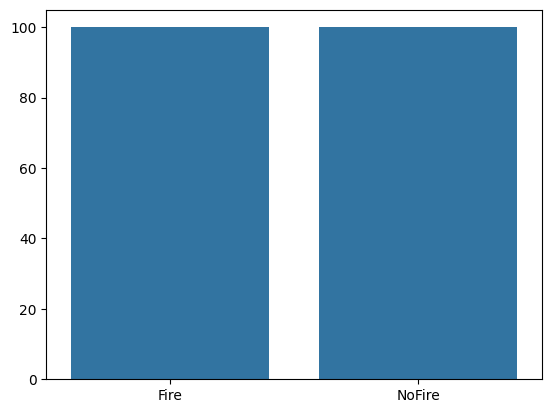


validation data


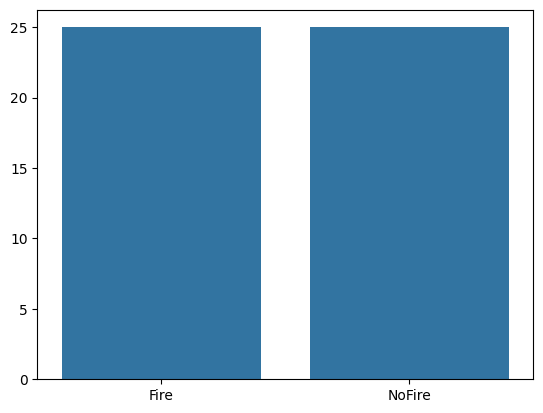

______________


100%|██████████| 2/2 [00:00<00:00,  2.35it/s]



📅 Epoch 1/50:
	🏋️‍♂️ Training step:
	 - 🎯 Loss: 0.8055, 📈 Accuracy: 0.4850
	🧪 Validation step:
	 - 🎯 Loss: 0.7630, 📈 Accuracy: 0.5200
⏱️ Time: 6.9798 sec



100%|██████████| 2/2 [00:00<00:00,  2.36it/s]



📅 Epoch 2/50:
	🏋️‍♂️ Training step:
	 - 🎯 Loss: 0.7944, 📈 Accuracy: 0.4300
	🧪 Validation step:
	 - 🎯 Loss: 0.7928, 📈 Accuracy: 0.5000
⏱️ Time: 4.7075 sec



100%|██████████| 2/2 [00:01<00:00,  1.95it/s]



📅 Epoch 3/50:
	🏋️‍♂️ Training step:
	 - 🎯 Loss: 0.7716, 📈 Accuracy: 0.4600
	🧪 Validation step:
	 - 🎯 Loss: 0.8255, 📈 Accuracy: 0.4000
⏱️ Time: 5.6683 sec



100%|██████████| 2/2 [00:00<00:00,  2.35it/s]



📅 Epoch 4/50:
	🏋️‍♂️ Training step:
	 - 🎯 Loss: 0.7578, 📈 Accuracy: 0.4950
	🧪 Validation step:
	 - 🎯 Loss: 0.8259, 📈 Accuracy: 0.4000
⏱️ Time: 4.7712 sec



100%|██████████| 2/2 [00:00<00:00,  2.31it/s]



📅 Epoch 5/50:
	🏋️‍♂️ Training step:
	 - 🎯 Loss: 0.7291, 📈 Accuracy: 0.5050
	🧪 Validation step:
	 - 🎯 Loss: 0.8123, 📈 Accuracy: 0.4000
⏱️ Time: 4.8115 sec



100%|██████████| 2/2 [00:00<00:00,  2.35it/s]



📅 Epoch 6/50:
	🏋️‍♂️ Training step:
	 - 🎯 Loss: 0.7497, 📈 Accuracy: 0.5150
	🧪 Validation step:
	 - 🎯 Loss: 0.8138, 📈 Accuracy: 0.3800
⏱️ Time: 5.5645 sec



100%|██████████| 2/2 [00:00<00:00,  2.36it/s]



📅 Epoch 7/50:
	🏋️‍♂️ Training step:
	 - 🎯 Loss: 0.7039, 📈 Accuracy: 0.5250
	🧪 Validation step:
	 - 🎯 Loss: 0.8093, 📈 Accuracy: 0.4200
⏱️ Time: 4.7041 sec



100%|██████████| 2/2 [00:01<00:00,  1.75it/s]



📅 Epoch 8/50:
	🏋️‍♂️ Training step:
	 - 🎯 Loss: 0.6769, 📈 Accuracy: 0.5800
	🧪 Validation step:
	 - 🎯 Loss: 0.8033, 📈 Accuracy: 0.4000
⏱️ Time: 5.4824 sec



100%|██████████| 2/2 [00:00<00:00,  2.37it/s]



📅 Epoch 9/50:
	🏋️‍♂️ Training step:
	 - 🎯 Loss: 0.7059, 📈 Accuracy: 0.5550
	🧪 Validation step:
	 - 🎯 Loss: 0.7982, 📈 Accuracy: 0.4000
⏱️ Time: 4.7567 sec



100%|██████████| 2/2 [00:00<00:00,  2.39it/s]



📅 Epoch 10/50:
	🏋️‍♂️ Training step:
	 - 🎯 Loss: 0.6652, 📈 Accuracy: 0.6000
	🧪 Validation step:
	 - 🎯 Loss: 0.7769, 📈 Accuracy: 0.4200
⏱️ Time: 4.7951 sec



100%|██████████| 2/2 [00:01<00:00,  1.66it/s]



📅 Epoch 11/50:
	🏋️‍♂️ Training step:
	 - 🎯 Loss: 0.6338, 📈 Accuracy: 0.6200
	🧪 Validation step:
	 - 🎯 Loss: 0.7630, 📈 Accuracy: 0.4000
⏱️ Time: 6.0350 sec



100%|██████████| 2/2 [00:00<00:00,  2.36it/s]



📅 Epoch 12/50:
	🏋️‍♂️ Training step:
	 - 🎯 Loss: 0.6331, 📈 Accuracy: 0.6200
	🧪 Validation step:
	 - 🎯 Loss: 0.7509, 📈 Accuracy: 0.4000
⏱️ Time: 5.1766 sec



100%|██████████| 2/2 [00:00<00:00,  2.24it/s]



📅 Epoch 13/50:
	🏋️‍♂️ Training step:
	 - 🎯 Loss: 0.6188, 📈 Accuracy: 0.6050
	🧪 Validation step:
	 - 🎯 Loss: 0.7415, 📈 Accuracy: 0.4800
⏱️ Time: 5.4072 sec



100%|██████████| 2/2 [00:00<00:00,  2.33it/s]



📅 Epoch 14/50:
	🏋️‍♂️ Training step:
	 - 🎯 Loss: 0.6016, 📈 Accuracy: 0.6450
	🧪 Validation step:
	 - 🎯 Loss: 0.7352, 📈 Accuracy: 0.4800
⏱️ Time: 4.8199 sec



100%|██████████| 2/2 [00:01<00:00,  1.96it/s]



📅 Epoch 15/50:
	🏋️‍♂️ Training step:
	 - 🎯 Loss: 0.6054, 📈 Accuracy: 0.6200
	🧪 Validation step:
	 - 🎯 Loss: 0.7167, 📈 Accuracy: 0.4600
⏱️ Time: 4.9706 sec



100%|██████████| 2/2 [00:00<00:00,  2.34it/s]



📅 Epoch 16/50:
	🏋️‍♂️ Training step:
	 - 🎯 Loss: 0.5837, 📈 Accuracy: 0.6850
	🧪 Validation step:
	 - 🎯 Loss: 0.7077, 📈 Accuracy: 0.4400
⏱️ Time: 5.5259 sec



100%|██████████| 2/2 [00:00<00:00,  2.36it/s]



📅 Epoch 17/50:
	🏋️‍♂️ Training step:
	 - 🎯 Loss: 0.5756, 📈 Accuracy: 0.7150
	🧪 Validation step:
	 - 🎯 Loss: 0.7008, 📈 Accuracy: 0.5200
⏱️ Time: 4.8043 sec



100%|██████████| 2/2 [00:00<00:00,  2.07it/s]



📅 Epoch 18/50:
	🏋️‍♂️ Training step:
	 - 🎯 Loss: 0.5395, 📈 Accuracy: 0.7250
	🧪 Validation step:
	 - 🎯 Loss: 0.6911, 📈 Accuracy: 0.5400
⏱️ Time: 5.5913 sec



100%|██████████| 2/2 [00:00<00:00,  2.32it/s]



📅 Epoch 19/50:
	🏋️‍♂️ Training step:
	 - 🎯 Loss: 0.5663, 📈 Accuracy: 0.7000
	🧪 Validation step:
	 - 🎯 Loss: 0.6787, 📈 Accuracy: 0.5400
⏱️ Time: 4.7303 sec



100%|██████████| 2/2 [00:00<00:00,  2.29it/s]



📅 Epoch 20/50:
	🏋️‍♂️ Training step:
	 - 🎯 Loss: 0.5399, 📈 Accuracy: 0.7400
	🧪 Validation step:
	 - 🎯 Loss: 0.6770, 📈 Accuracy: 0.5200
⏱️ Time: 4.8026 sec



100%|██████████| 2/2 [00:00<00:00,  2.34it/s]



📅 Epoch 21/50:
	🏋️‍♂️ Training step:
	 - 🎯 Loss: 0.5433, 📈 Accuracy: 0.7400
	🧪 Validation step:
	 - 🎯 Loss: 0.6590, 📈 Accuracy: 0.5800
⏱️ Time: 5.5247 sec



100%|██████████| 2/2 [00:00<00:00,  2.32it/s]



📅 Epoch 22/50:
	🏋️‍♂️ Training step:
	 - 🎯 Loss: 0.5278, 📈 Accuracy: 0.7350
	🧪 Validation step:
	 - 🎯 Loss: 0.6565, 📈 Accuracy: 0.5800
⏱️ Time: 4.7332 sec



100%|██████████| 2/2 [00:01<00:00,  1.78it/s]



📅 Epoch 23/50:
	🏋️‍♂️ Training step:
	 - 🎯 Loss: 0.5194, 📈 Accuracy: 0.7000
	🧪 Validation step:
	 - 🎯 Loss: 0.6475, 📈 Accuracy: 0.5800
⏱️ Time: 5.4937 sec



100%|██████████| 2/2 [00:00<00:00,  2.31it/s]



📅 Epoch 24/50:
	🏋️‍♂️ Training step:
	 - 🎯 Loss: 0.5326, 📈 Accuracy: 0.7300
	🧪 Validation step:
	 - 🎯 Loss: 0.6344, 📈 Accuracy: 0.5800
⏱️ Time: 4.8567 sec



100%|██████████| 2/2 [00:00<00:00,  2.30it/s]



📅 Epoch 25/50:
	🏋️‍♂️ Training step:
	 - 🎯 Loss: 0.5045, 📈 Accuracy: 0.7850
	🧪 Validation step:
	 - 🎯 Loss: 0.6322, 📈 Accuracy: 0.6000
⏱️ Time: 4.7691 sec



100%|██████████| 2/2 [00:00<00:00,  2.38it/s]



📅 Epoch 26/50:
	🏋️‍♂️ Training step:
	 - 🎯 Loss: 0.4816, 📈 Accuracy: 0.7950
	🧪 Validation step:
	 - 🎯 Loss: 0.6151, 📈 Accuracy: 0.6400
⏱️ Time: 5.4317 sec



100%|██████████| 2/2 [00:00<00:00,  2.35it/s]



📅 Epoch 27/50:
	🏋️‍♂️ Training step:
	 - 🎯 Loss: 0.5077, 📈 Accuracy: 0.7950
	🧪 Validation step:
	 - 🎯 Loss: 0.6048, 📈 Accuracy: 0.6600
⏱️ Time: 4.7103 sec



100%|██████████| 2/2 [00:01<00:00,  1.71it/s]



📅 Epoch 28/50:
	🏋️‍♂️ Training step:
	 - 🎯 Loss: 0.4560, 📈 Accuracy: 0.8350
	🧪 Validation step:
	 - 🎯 Loss: 0.6003, 📈 Accuracy: 0.6400
⏱️ Time: 5.6383 sec



100%|██████████| 2/2 [00:00<00:00,  2.33it/s]



📅 Epoch 29/50:
	🏋️‍♂️ Training step:
	 - 🎯 Loss: 0.4532, 📈 Accuracy: 0.8250
	🧪 Validation step:
	 - 🎯 Loss: 0.5927, 📈 Accuracy: 0.6800
⏱️ Time: 4.8093 sec



100%|██████████| 2/2 [00:00<00:00,  2.36it/s]



📅 Epoch 30/50:
	🏋️‍♂️ Training step:
	 - 🎯 Loss: 0.5009, 📈 Accuracy: 0.7900
	🧪 Validation step:
	 - 🎯 Loss: 0.5793, 📈 Accuracy: 0.7400
⏱️ Time: 4.7451 sec



100%|██████████| 2/2 [00:00<00:00,  2.32it/s]



📅 Epoch 31/50:
	🏋️‍♂️ Training step:
	 - 🎯 Loss: 0.4449, 📈 Accuracy: 0.8250
	🧪 Validation step:
	 - 🎯 Loss: 0.5702, 📈 Accuracy: 0.7200
⏱️ Time: 5.5906 sec



100%|██████████| 2/2 [00:00<00:00,  2.30it/s]



📅 Epoch 32/50:
	🏋️‍♂️ Training step:
	 - 🎯 Loss: 0.4420, 📈 Accuracy: 0.8650
	🧪 Validation step:
	 - 🎯 Loss: 0.5608, 📈 Accuracy: 0.7400
⏱️ Time: 4.7934 sec



100%|██████████| 2/2 [00:01<00:00,  1.67it/s]



📅 Epoch 33/50:
	🏋️‍♂️ Training step:
	 - 🎯 Loss: 0.4330, 📈 Accuracy: 0.8700
	🧪 Validation step:
	 - 🎯 Loss: 0.5627, 📈 Accuracy: 0.7600
⏱️ Time: 5.5290 sec



100%|██████████| 2/2 [00:00<00:00,  2.36it/s]



📅 Epoch 34/50:
	🏋️‍♂️ Training step:
	 - 🎯 Loss: 0.4380, 📈 Accuracy: 0.8400
	🧪 Validation step:
	 - 🎯 Loss: 0.5503, 📈 Accuracy: 0.7600
⏱️ Time: 4.9674 sec



100%|██████████| 2/2 [00:00<00:00,  2.32it/s]



📅 Epoch 35/50:
	🏋️‍♂️ Training step:
	 - 🎯 Loss: 0.4288, 📈 Accuracy: 0.8800
	🧪 Validation step:
	 - 🎯 Loss: 0.5404, 📈 Accuracy: 0.8200
⏱️ Time: 4.7153 sec



100%|██████████| 2/2 [00:00<00:00,  2.34it/s]



📅 Epoch 36/50:
	🏋️‍♂️ Training step:
	 - 🎯 Loss: 0.3812, 📈 Accuracy: 0.8750
	🧪 Validation step:
	 - 🎯 Loss: 0.5253, 📈 Accuracy: 0.7800
⏱️ Time: 5.6191 sec



100%|██████████| 2/2 [00:00<00:00,  2.37it/s]



📅 Epoch 37/50:
	🏋️‍♂️ Training step:
	 - 🎯 Loss: 0.4039, 📈 Accuracy: 0.8700
	🧪 Validation step:
	 - 🎯 Loss: 0.5198, 📈 Accuracy: 0.7800
⏱️ Time: 4.7479 sec



100%|██████████| 2/2 [00:01<00:00,  1.66it/s]



📅 Epoch 38/50:
	🏋️‍♂️ Training step:
	 - 🎯 Loss: 0.4064, 📈 Accuracy: 0.8700
	🧪 Validation step:
	 - 🎯 Loss: 0.5145, 📈 Accuracy: 0.8200
⏱️ Time: 5.2341 sec



100%|██████████| 2/2 [00:00<00:00,  2.31it/s]



📅 Epoch 39/50:
	🏋️‍♂️ Training step:
	 - 🎯 Loss: 0.4194, 📈 Accuracy: 0.8900
	🧪 Validation step:
	 - 🎯 Loss: 0.5111, 📈 Accuracy: 0.8200
⏱️ Time: 5.1703 sec



100%|██████████| 2/2 [00:00<00:00,  2.34it/s]



📅 Epoch 40/50:
	🏋️‍♂️ Training step:
	 - 🎯 Loss: 0.3627, 📈 Accuracy: 0.9100
	🧪 Validation step:
	 - 🎯 Loss: 0.5144, 📈 Accuracy: 0.8200
⏱️ Time: 4.8741 sec



100%|██████████| 2/2 [00:00<00:00,  2.29it/s]



📅 Epoch 41/50:
	🏋️‍♂️ Training step:
	 - 🎯 Loss: 0.3607, 📈 Accuracy: 0.9450
	🧪 Validation step:
	 - 🎯 Loss: 0.5027, 📈 Accuracy: 0.8200
⏱️ Time: 5.5947 sec



100%|██████████| 2/2 [00:00<00:00,  2.33it/s]



📅 Epoch 42/50:
	🏋️‍♂️ Training step:
	 - 🎯 Loss: 0.3720, 📈 Accuracy: 0.9000
	🧪 Validation step:
	 - 🎯 Loss: 0.4949, 📈 Accuracy: 0.8200
⏱️ Time: 4.7812 sec



100%|██████████| 2/2 [00:01<00:00,  1.67it/s]



📅 Epoch 43/50:
	🏋️‍♂️ Training step:
	 - 🎯 Loss: 0.3715, 📈 Accuracy: 0.8900
	🧪 Validation step:
	 - 🎯 Loss: 0.4919, 📈 Accuracy: 0.8200
⏱️ Time: 5.1452 sec



100%|██████████| 2/2 [00:00<00:00,  2.34it/s]



📅 Epoch 44/50:
	🏋️‍♂️ Training step:
	 - 🎯 Loss: 0.3827, 📈 Accuracy: 0.9150
	🧪 Validation step:
	 - 🎯 Loss: 0.4883, 📈 Accuracy: 0.8200
⏱️ Time: 5.2493 sec



100%|██████████| 2/2 [00:00<00:00,  2.34it/s]



📅 Epoch 45/50:
	🏋️‍♂️ Training step:
	 - 🎯 Loss: 0.3448, 📈 Accuracy: 0.9200
	🧪 Validation step:
	 - 🎯 Loss: 0.4829, 📈 Accuracy: 0.8400
⏱️ Time: 4.8099 sec



100%|██████████| 2/2 [00:00<00:00,  2.35it/s]



📅 Epoch 46/50:
	🏋️‍♂️ Training step:
	 - 🎯 Loss: 0.3470, 📈 Accuracy: 0.9150
	🧪 Validation step:
	 - 🎯 Loss: 0.4712, 📈 Accuracy: 0.8600
⏱️ Time: 5.5891 sec



100%|██████████| 2/2 [00:00<00:00,  2.33it/s]



📅 Epoch 47/50:
	🏋️‍♂️ Training step:
	 - 🎯 Loss: 0.3662, 📈 Accuracy: 0.9250
	🧪 Validation step:
	 - 🎯 Loss: 0.4615, 📈 Accuracy: 0.8600
⏱️ Time: 4.7888 sec



100%|██████████| 2/2 [00:01<00:00,  1.78it/s]



📅 Epoch 48/50:
	🏋️‍♂️ Training step:
	 - 🎯 Loss: 0.3306, 📈 Accuracy: 0.9150
	🧪 Validation step:
	 - 🎯 Loss: 0.4567, 📈 Accuracy: 0.8600
⏱️ Time: 5.0598 sec



100%|██████████| 2/2 [00:00<00:00,  2.33it/s]



📅 Epoch 49/50:
	🏋️‍♂️ Training step:
	 - 🎯 Loss: 0.3457, 📈 Accuracy: 0.9050
	🧪 Validation step:
	 - 🎯 Loss: 0.4571, 📈 Accuracy: 0.8600
⏱️ Time: 5.2614 sec



100%|██████████| 2/2 [00:00<00:00,  2.35it/s]



📅 Epoch 50/50:
	🏋️‍♂️ Training step:
	 - 🎯 Loss: 0.3242, 📈 Accuracy: 0.9550
	🧪 Validation step:
	 - 🎯 Loss: 0.4489, 📈 Accuracy: 0.8600
⏱️ Time: 4.7902 sec

Model saved to :./models/model_acc_86_device_xpu_lr_1e-06_epochs_50.pt
Time elapsed: 257.57287883758545 seconds.


In [12]:
import os
os.environ["WANDB_DIR"] = "./wandb_logs/"
import pathlib
import warnings
import random
import time
import gc
from typing import Tuple
#import glob
from PIL import Image
from os.path import exists
import os
warnings.filterwarnings("ignore")

import torch
import numpy as np
import matplotlib.pyplot as plt
import wandb

from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset

from batch_finder import optimum_batch_size
from config import set_seed, device
from data_loader import (
    TRAIN_DIR,
    VALID_DIR,
    augment_and_save,
    data_distribution,
    imagenet_stats,
    img_transforms,
    plot_data_distribution,
    show_data,
)
from metrics import Metrics
from model import FireFinder
from trainer import Trainer
from lr_finder import LearningRateFinder
from torch import optim

# hyper params
#테스트 결과 50epochs 이후로 큰 변화가 없어서 스톱
EPOCHS = 50 #20
DROPOUT = .6
LR = 1e-6 #2.14e-4
#LR = 3.e-3
TEST_DIR = 'data/shift/'
BATCH_SIZE = 32 #128  # Default batch size
cuda = torch.device("cuda")#cuda

def create_dataloader(
    directory: str, batch_size: int, shuffle: bool = False, transform=None
) -> DataLoader:
    """
    Create a DataLoader from a directory of images.

    Args:
        directory (str): Directory containing images.
        batch_size (int): Batch size for the DataLoader.
        shuffle (bool, optional): Whether to shuffle the data. Defaults to False.
        transform ([type], optional): Transformations to apply to the images. Defaults to None.

    Returns:
        DataLoader: DataLoader with images from the directory.
    """
    data = datasets.ImageFolder(directory, transform=transform)
    return DataLoader(data, batch_size=batch_size, shuffle=shuffle)


def setup_dataloaders(config: dict) -> Tuple[DataLoader, DataLoader]:
    """
    Setup train and validation DataLoaders.

    Args:
        config (dict): Configuration dictionary containing batch_size.

    Returns:
        Tuple[DataLoader, DataLoader]: A tuple containing train and validation dataloaders.
    """
    return create_dataloader(
        TRAIN_DIR, config["batch_size"], shuffle=True, transform=img_transforms["train"]
    ), create_dataloader(
        VALID_DIR, config["batch_size"], transform=img_transforms["valid"]
    )


def find_lr(model: FireFinder, optimizer: optim.Adam, dataloader: DataLoader) -> float:
    """
    Find best learning rate using Learning Rate Finder.

    Args:
        model (FireFinder): FireFinder model.
        optimizer (optim.Adam): Adam optimizer.
        dataloader (DataLoader): DataLoader with training data.

    Returns:
        float: Best learning rate.
    """
    lr_finder = LearningRateFinder(model, optimizer, device)
    best_lr = lr_finder.lr_range_test(dataloader, start_lr=1e-2, end_lr=1e-5)
    return best_lr


def train(model: FireFinder, trainer: Trainer, config: dict):
    """
    Train a FireFinder model.

    Args:
        model (FireFinder): FireFinder model.
        trainer (Trainer): Trainer to train the model.
        config (dict): Configuration dictionary containing learning rate and batch size.
    """
    train_dataloader, valid_dataloader = setup_dataloaders(config)
    print("training data")
    plot_data_distribution(data_distribution(train_dataloader.dataset, TRAIN_DIR))
    print("\nvalidation data")
    plot_data_distribution(data_distribution(valid_dataloader.dataset, VALID_DIR))
    print(f"______________")
    start = time.time()
    val_acc = trainer.fine_tune(train_dataloader, valid_dataloader)
    model_save_path = f"./models/model_acc_{val_acc}_device_{device}_lr_{trainer.lr}_epochs_{EPOCHS}.pt"
    torch.save(model.state_dict(), model_save_path)

    model.eval()
    with torch.no_grad():
        model_scripted = torch.jit.script(model)  # Export to TorchScript
        model_scripted.save(f"{model_save_path.replace('.pt','_jit.pt')}")  # Jit Save

    print(f"Model saved to :{model_save_path}")
    print(f"Time elapsed: {time.time() - start} seconds.")


def main(
    aug_data: bool = False,
    find_batch: bool = False,
    find_lr_rate: bool = False,
    use_wandb: bool = True,
    use_ipex=True,
):
    """
    Main function to execute the fine-tuning process.

    Args:
        aug_data (bool, optional): Whether to augment data. Defaults to False.
        find_batch (bool, optional): Whether to find optimal batch size. Defaults to False.
        find_lr_rate (bool, optional): Whether to find optimal learning rate. Defaults to False.
    """
#    import os
#    os.environ['WANDB_EXECUTABLE'] = '~/.conda/envs/PT/bin/python'

    set_seed(42)
    print(f"Train folder {TRAIN_DIR}")
    print(f"Validation folder {VALID_DIR}")
    print(f"Using epoch: {EPOCHS}")
    print(f"Using Dropout: {DROPOUT}")

    batch_size = BATCH_SIZE

    if aug_data:
        print("Augmenting training and validation datasets...")
        t1 = time.time()
        augment_and_save(TRAIN_DIR)
        augment_and_save(VALID_DIR)
        print(f"Done Augmenting in {time.time() - t1} seconds...")

    model = FireFinder(simple=True, dropout=DROPOUT)
    optimizer = optim.Adam(model.parameters(), lr=LR)
    if find_batch:
        print(f"Finding optimum batch size...")
        batch_size = optimum_batch_size(model, input_size=(3, 224, 224))
    print(f"Using batch size: {batch_size}")

    best_lr = LR
    if find_lr_rate:
        print("Finding best init lr...")
        train_dataloader = create_dataloader(
            TRAIN_DIR,
            batch_size=batch_size,
            shuffle=True,
            transform=img_transforms["train"],
        )
        best_lr = find_lr(model, optimizer, train_dataloader)
        del model, optimizer
        gc.collect()
        if device == torch.device("xpu"):
            torch.xpu.empty_cache()
    print(f"Using learning rate: {best_lr}")

    model = FireFinder(simple=True, dropout=DROPOUT)
    trainer = Trainer(
        model=model,
        optimizer=optim.Adam,
        lr=best_lr,
        epochs=EPOCHS,
        device=cuda,
        use_ipex=use_ipex,
    )
    train(model, trainer, config={"lr": best_lr, "batch_size": batch_size})

if __name__ == "__main__":
    main(
        aug_data=False, find_batch=False, find_lr_rate=False, use_wandb=True, use_ipex=False
    )

### 7*7 테스트 코드

In [16]:
from PIL import Image
import os
import itertools

# 색상 강화 설정값
color_enhancement_values = [-0.15, -0.1, -0.05, 0, 0.05, 0.1, 0.15]

# 폴더 생성 (49개의 조합에 대한 폴더)
try:
    for r_perc, g_perc in itertools.product(color_enhancement_values, repeat=2):
        for category in ["Fire", "NoFire"]:
            for data_type in ["train", "val"]:
                os.makedirs(f'data/colorEnhanced/{data_type}/{category}_r{r_perc}_g{g_perc}', exist_ok=True)
except FileExistsError:
    print("폴더가 이미 존재합니다.")

# 색상 강화 함수 (변경 없음)
def colorEnhancedIm(fldrIn, fn, fldrOut, r_perc, g_perc, type='png'):
    path = fldrIn + fn
    im = Image.open(path).convert('RGB')

    # Split into 3 channels
    r, g, b = im.split()

    # R 채널 증가, G 채널 감소
    r = r.point(lambda i: i * (1 + r_perc))
    g = g.point(lambda i: i * (1 + g_perc))  # 1 + g_perc 로 변경

    # Recombine back to RGB image
    result = Image.merge('RGB', (r, g, b))

    result.save(f'{fldrOut}/{fn}')
    im.close()

import glob

# Fire 이미지 처리
for r_perc, g_perc in itertools.product(color_enhancement_values, repeat=2):
    print(f"Processing Fire images with r_perc={r_perc}, g_perc={g_perc}")

    for data_type in ["train", "val"]:
        fldrIn = f"data/synthetic/{data_type}/Fire/"
        fldrOut = f"data/colorEnhanced/{data_type}/Fire_r{r_perc}_g{g_perc}/"
        for fn in glob.glob(fldrIn + "*.png"):
            fn_trunc = fn.split('/')[-1]
            colorEnhancedIm(fldrIn, fn_trunc, fldrOut, r_perc, g_perc)

# NoFire 이미지 처리
for r_perc, g_perc in itertools.product(color_enhancement_values, repeat=2):
    print(f"Processing NoFire images with r_perc={r_perc}, g_perc={g_perc}")

    for data_type in ["train", "val"]:
        fldrIn = f"data/synthetic/{data_type}/NoFire/"
        fldrOut = f"data/colorEnhanced/{data_type}/NoFire_r{r_perc}_g{g_perc}/"
        for fn in glob.glob(fldrIn + "*.png"):
            fn_trunc = fn.split('/')[-1]
            colorEnhancedIm(fldrIn, fn_trunc, fldrOut, r_perc, g_perc)

print("done")


Processing Fire images with r_perc=-0.15, g_perc=-0.15
Processing Fire images with r_perc=-0.15, g_perc=-0.1
Processing Fire images with r_perc=-0.15, g_perc=-0.05
Processing Fire images with r_perc=-0.15, g_perc=0
Processing Fire images with r_perc=-0.15, g_perc=0.05
Processing Fire images with r_perc=-0.15, g_perc=0.1
Processing Fire images with r_perc=-0.15, g_perc=0.15
Processing Fire images with r_perc=-0.1, g_perc=-0.15
Processing Fire images with r_perc=-0.1, g_perc=-0.1
Processing Fire images with r_perc=-0.1, g_perc=-0.05
Processing Fire images with r_perc=-0.1, g_perc=0
Processing Fire images with r_perc=-0.1, g_perc=0.05
Processing Fire images with r_perc=-0.1, g_perc=0.1
Processing Fire images with r_perc=-0.1, g_perc=0.15
Processing Fire images with r_perc=-0.05, g_perc=-0.15
Processing Fire images with r_perc=-0.05, g_perc=-0.1
Processing Fire images with r_perc=-0.05, g_perc=-0.05
Processing Fire images with r_perc=-0.05, g_perc=0
Processing Fire images with r_perc=-0.05